In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
data_2d = pd.read_csv('bikes_rent.csv')
data_mnist = pd.read_csv('data_2d.csv')

print(data_2d.head())
print(data_mnist.head())


   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  
   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2        

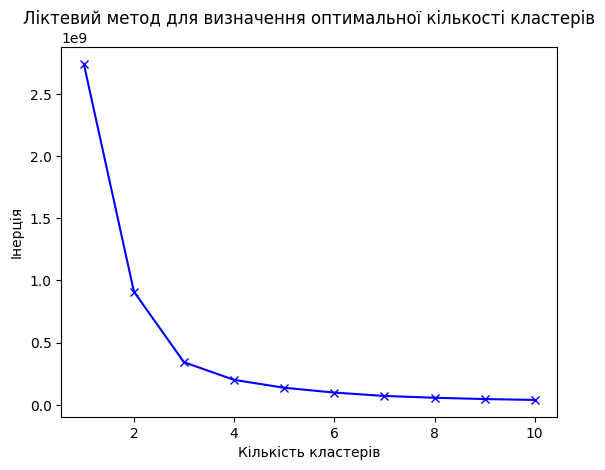

In [10]:
inertia = []
K = range(1, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_2d)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Ліктевий метод для визначення оптимальної кількості кластерів')
plt.show()


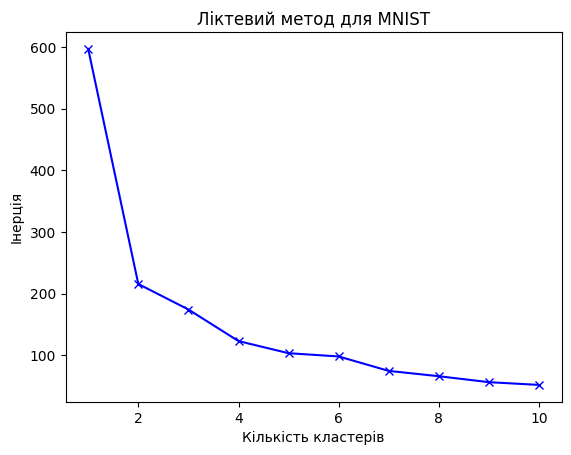

In [11]:
scaler = StandardScaler()
data_mnist_scaled = scaler.fit_transform(data_mnist)

inertia_mnist = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_mnist_scaled)
    inertia_mnist.append(kmeans.inertia_)

plt.plot(K, inertia_mnist, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Ліктевий метод для MNIST')
plt.show()


In [12]:
optimal_k = 3

kmeans_2d = KMeans(n_clusters=optimal_k)
data_2d['Cluster'] = kmeans_2d.fit_predict(data_2d)

kmeans_mnist = KMeans(n_clusters=optimal_k)
mnist_clusters = kmeans_mnist.fit_predict(data_mnist_scaled)


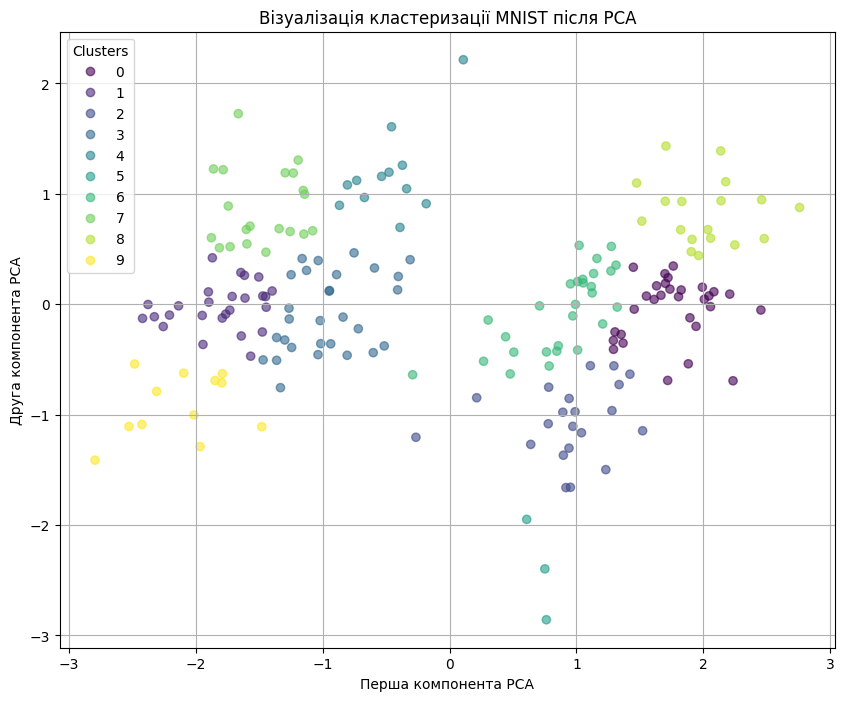

In [15]:
scaler = StandardScaler()
data_mnist_scaled = scaler.fit_transform(data_mnist)

optimal_k = 10
kmeans_mnist = KMeans(n_clusters=optimal_k)
mnist_clusters = kmeans_mnist.fit_predict(data_mnist_scaled)

pca = PCA(n_components=2)
data_mnist_pca = pca.fit_transform(data_mnist_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_mnist_pca[:, 0], data_mnist_pca[:, 1], c=mnist_clusters, cmap='viridis', alpha=0.6)

plt.legend(*scatter.legend_elements(), title="Clusters")

plt.title('Візуалізація кластеризації MNIST після PCA')
plt.xlabel('Перша компонента PCA')
plt.ylabel('Друга компонента PCA')
plt.grid()
plt.show()